# Worksheet 03A: Data Wrangling II and ggplot2 II
*Icíar Fernández Boyano*

**Version 1.1**

Fixes:

- Solution structure in comments moved to markdown since Question 1.6+ code to fix wasn't showing
- Change non-autograded cells from autograded answer to none

## Instructions + Grading

+ To get full marks for each participation worksheet, you must successfully answer at least 40% of all autograded questions. In this worksheet, 40% are 4 questions.

+ Autograded questions are easily identifiable throughout the worksheet, labelled as **QUESTION**. Any other instructions that prompt the student to write code are activities, which are not graded and thus do not contribute to marks - but do contribute to the workflow of the worksheet!

+ Run this code chunk to load the packages required for the autograder:

If there are any packages which are not yet installed, you can use the code cell below to install them. But please do not keep the `install.packages()` code in the script after running it!

In [1]:
# Install packages here
# install.packages('ggridges')


The downloaded binary packages are in
	/var/folders/y_/lksq761s43qf4_qnzs85f24w0000gn/T//RtmpmeTZ02/downloaded_packages


Use the following code cell to load any additional packages you want to use for this worksheet. You may not need to use this code cell at all.

In [34]:
# Load additional packages here
# library(ggridges)

Run the code cell below to load the packages.

In [35]:
library(testthat)
library(digest)

## Attributions

The following resources were used as inspiration in the creation of this worksheet:

+ [R4DS Data Manipulation Chapter](https://r4ds.had.co.nz/transform.html)
+ [Rebecca Barter's post on across()](http://www.rebeccabarter.com/blog/2020-07-09-across/)
+ STAT545 materials from previous years 
+ [Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/articles/examples.html)

## 0. Interacting with this Worksheet: Running code in jupyter

In Episode 01A of the [STAT 545 video series](https://www.youtube.com/channel/UCrB-uourf2vxGeBnGjQrA0w), RStudio was mentioned as being an IDE for R. You're probably viewing this worksheet in another IDE called **jupyter**. We're using jupyter for the STAT 545 worksheets because it works well with an autograder called nbgrader.

Try running the R code in the following _cell_: click on the cell, and either click "Run" in your toolbar, or press "Shift + Enter" or "Shift + Return".

In [36]:
1 + 1

[1] 2

The output appears below the cell.

Also notice that you can't change the above code. We've programmed the worksheet that way to preserve the worksheet structure -- another plus to jupyter over RStudio here. The only cells you can change are the ones where we prompt you for input.

## Class 6: The nuts and bolts of data wrangling 

This section of the worksheet is to be completed during **Class 6: Data Wrangling II.** By the end of today's worksheet, you will be able to: 
1. Use group_by(), and scoped variants of summarise() and mutate(), with across()
2. Apply your dplyr knowledge to exploratory data analysis of a dataset

### 1.0 Get started

Load the `gapminder`, `palmerpenguins`, and `tidyverse` packages.

In [37]:
library(gapminder)
library(palmerpenguins)
library(tidyverse)

### 1.1 Practicing dplyr verbs

In Data Wrangling II (Class 7), you have learned to use:

+ `group_by()`
+ `summarize()`
+ `across() `

*Questions 1.0 and 1.1 use the `gapminder` dataset. The remaining questions in this section use the `penguins` dataset.*

**QUESTION 1.0**

Make a tibble that accomplishes the following. Use a single expression using the pipe operator. 

+ Add a column called `min_life` of the *minimum* life expectancy for each continent and each year of the `gapminder` dataset -- but keep the same amount of rows as in the original gapminder data set.
+ Add a column called `min_country` containing the country name having the lowest life expectancy for that year and that continent -- again, keeping the same amount of rows as the original.
+ `arrange` by min life expectancy

Assign your answer to a variable named `answer1.0`

```
answer1.0 <- gapminder %>% 
 group_by(FILL_THIS_IN) %>% 
 FILL_THIS_IN(min_life = min(lifeExp),
              min_country = country[lifeExp == FILL_THIS_IN]) %>%
 arrange(FILL_THIS_IN)
 ```

In [38]:
### BEGIN SOLUTION
answer1.0 <- gapminder %>% 
  group_by(continent, year) %>% 
  mutate(min_life = min(lifeExp),
         min_country = country[lifeExp == min_life]) %>%
  arrange(min_life)
### END SOLUTION
print(answer1.0)

# A tibble: 1,704 x 8
# Groups:   continent, year [60]
   country         continent  year lifeExp    pop gdpPercap min_life min_country
   <fct>           <fct>     <int>   <dbl>  <int>     <dbl>    <dbl> <fct>      
 1 Algeria         Africa     1992    67.7 2.63e7     5023.     23.6 Rwanda     
 2 Angola          Africa     1992    40.6 8.74e6     2628.     23.6 Rwanda     
 3 Benin           Africa     1992    53.9 4.98e6     1191.     23.6 Rwanda     
 4 Botswana        Africa     1992    62.7 1.34e6     7954.     23.6 Rwanda     
 5 Burkina Faso    Africa     1992    50.3 8.88e6      932.     23.6 Rwanda     
 6 Burundi         Africa     1992    44.7 5.81e6      632.     23.6 Rwanda     
 7 Cameroon        Africa     1992    54.3 1.25e7     1793.     23.6 Rwanda     
 8 Central Africa… Africa     1992    49.4 3.27e6      748.     23.6 Rwanda     
 9 Chad            Africa     1992    51.7 6.43e6     1058.     23.6 Rwanda     
10 Comoros         Africa     1992    57.9 4.54e5     

In [39]:
test_that("Answer 1.0", {
    expect_true("min_country" %in% names(answer1.0))
    expect_true("min_life" %in% names(answer1.0))
    expect_equal(answer1.0$min_life[1], 23.599)
    expect_equal(answer1.0$min_life[1704], 80.204)
    expect_equal(
        digest(as.character(unique(answer1.0$min_country))),
        '7b278f7b9cfb884d5210390f056d4aeb'
    )
    expect_equal(nrow(answer1.0), 1704)
})
cat("success!")

success!

**QUESTION 1.1**

Calculate the growth in population since the first year on record _for each country_ by **rearranging the following lines**, and **filling in the `FILL_THIS_IN`**. Name the column `rel_growth`. Here's another convenience function for you: `dplyr::first()`.

Assign your answer to a variable named `answer1.1`

```
answer1.1 <-
    mutate(rel_growth = FILL_THIS_IN) %>% 
    arrange(FILL_THIS_IN) %>% 
    gapminder %>% 
    group_by(country) %>% 
```

In [40]:
### BEGIN SOLUTION
answer1.1 <- gapminder %>% 
  group_by(country) %>% 
  arrange(year) %>% 
  mutate(rel_growth = pop - first(pop))
### END SOLUTION
print(answer1.1)

# A tibble: 1,704 x 7
# Groups:   country [142]
   country     continent  year lifeExp      pop gdpPercap rel_growth
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>      <int>
 1 Afghanistan Asia       1952    28.8  8425333      779.          0
 2 Albania     Europe     1952    55.2  1282697     1601.          0
 3 Algeria     Africa     1952    43.1  9279525     2449.          0
 4 Angola      Africa     1952    30.0  4232095     3521.          0
 5 Argentina   Americas   1952    62.5 17876956     5911.          0
 6 Australia   Oceania    1952    69.1  8691212    10040.          0
 7 Austria     Europe     1952    66.8  6927772     6137.          0
 8 Bahrain     Asia       1952    50.9   120447     9867.          0
 9 Bangladesh  Asia       1952    37.5 46886859      684.          0
10 Belgium     Europe     1952    68    8730405     8343.          0
# … with 1,694 more rows


In [41]:
test_that("Answer 1.1", {
    expect_equal(nrow(answer1.0), 1704)
    c('country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'rel_growth') %>% 
       map_lgl(~ .x %in% names(answer1.1)) %>% 
       all() %>% 
       expect_true()
    expect_equal(digest(as.integer(answer1.1$rel_growth)), '26735e4b17481f965f9eb1d3b5de89ad')
})
cat("success!")

success!

**QUESTION 1.2**

Let's work with the `penguins` dataset from the `palmerpenguins` package. To find out which penguin species has the greatest mean body mass, calculate a mean body mass for each species, and store it in a column named `body_mass`. Order the results in descending order of `body_mass`.

Assign your answer to a variable named `answer1.2`

```
answer1.2 <- penguins %>%
 group_by(FILL_THIS_IN) %>%
 summarise(body_mass = mean(FILL_THIS_IN, na.rm = TRUE)) %>%
 arrange(FILL_THIS_IN(FILL_THIS_IN))
```

In [42]:
### BEGIN SOLUTION
answer1.2 <- penguins %>%
  group_by(species) %>%
  summarise(body_mass = mean(body_mass_g, na.rm = TRUE)) %>%
  arrange(desc(body_mass))
### END SOLUTION
print(answer1.2)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 3 x 2
  species   body_mass
  <fct>         <dbl>
1 Gentoo        5076.
2 Chinstrap     3733.
3 Adelie        3701.


In [43]:
test_that("Answer 1.2", {
    expect_equal(digest(as.character(answer1.2$species)), 'dad482699761c3b2907f181ac1b4af11')
    expect_equal(digest(round(answer1.2$body_mass, 2)), '6e6ed88f2b45893ae00bec197346eed4')
})
cat("success!")

success!

**QUESTION 1.3**

In a single expression, make a tibble with the following columns *for each island* in the penguins data set:

+ What is the *mean* of each numeric variable in the `penguins` dataset in each island? Keep the column names the same.
+ How many penguins are there in each island? Add this to a column named `n`.

Assign your answer to a variable named `answer1.3`

```
answer1.3 <- penguins %>% 
 group_by(FILL_THIS_IN) %>% 
 filter(n() > 1) %>% 
 summarise(across(where(FILL_THIS_IN), FILL_THIS_IN, na.rm = TRUE), 
           n = n())
```

In [44]:
### BEGIN SOLUTION 
answer1.3 <- penguins %>% 
  group_by(island) %>% 
  filter(n() > 1) %>% 
  summarise(across(where(is.numeric), mean, na.rm = TRUE), 
            n = n())
### END SOLUTION
print(answer1.3)        

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 3 x 7
  island   bill_length_mm bill_depth_mm flipper_length_… body_mass_g  year     n
  <fct>             <dbl>         <dbl>            <dbl>       <dbl> <dbl> <int>
1 Biscoe             45.3          15.9             210.       4716. 2008.   168
2 Dream              44.2          18.3             193.       3713. 2008.   124
3 Torgers…           39.0          18.4             191.       3706. 2008.    52


In [45]:
test_that("Answer 1.3", {
    expect_equal(
        answer1.3 %>% 
          mutate(across(where(is.numeric), round, digits = 0)) %>% 
          unclass() %>% 
          digest(),
        "b06d7816762e489a57ca922d175f08ef"
    )
})
cat("success!")

success!

**QUESTION 1.4**

Identify how many missing values there are in each column of the `penguins` dataset. Hint: use `summarise()`, `everything()` and `across()`.

Assign your answer to a variable named `answer1.4`. It should be a tibble with one row and the same column names as the original `penguins` dataset.

```
answer1.4 <- FILL_THIS_IN %>%
 FILL_THIS_IN(FILL_THIS_IN(FILL_THIS_IN(),
                           ~sum(is.na(.))))
```                           

In [46]:
### BEGIN SOLUTION
answer1.4 <- penguins %>%
  summarise(across(everything(), 
                   ~sum(is.na(.))))
### END SOLUTION
print(answer1.4)

# A tibble: 1 x 8
  species island bill_length_mm bill_depth_mm flipper_length_… body_mass_g   sex
    <int>  <int>          <int>         <int>            <int>       <int> <int>
1       0      0              2             2                2           2    11
# … with 1 more variable: year <int>


In [47]:
test_that("Answer 1.4", {
    expect_equal(digest(unname(as.matrix(answer1.4))[1, ]), "299537c4d0eeeca44bddd11a2b02f68d")
})
cat("success!")

success!

`~` indicates that you have started an anonymous function, the argument of which can be defined with `.x` or `.`. `~sum(is.na(.))` calculates how many NA values there are in each column (represented by `.`) and adds them up.

**QUESTION 1.5**

Replace the missing values of the numeric columns in the `penguins` dataset with the *mean* of the relevant column. Hint: `FILL_THIS_IN_SAME` should be the same in all three expressions where it is noted. Another hint, look at question 1.4 above!

Assign your answer to a variable named `answer1.5`

```
answer1.5 <- penguins %>%
 FILL_THIS_IN(across(FILL_THIS_IN(is.numeric), ~if_else(is.na(FILL_THIS_IN_SAME), mean(FILL_THIS_IN_SAME, na.rm = T), as.numeric(FILL_THIS_IN_SAME))))
```

In [48]:
### BEGIN SOLUTION
answer1.5 <- penguins %>%
  mutate(across(where(is.numeric), ~if_else(is.na(.), mean(., na.rm = T), as.numeric(.))))
### END SOLUTION
print(answer1.5)

# A tibble: 344 x 8
   species island bill_length_mm bill_depth_mm flipper_length_… body_mass_g
   <fct>   <fct>           <dbl>         <dbl>            <dbl>       <dbl>
 1 Adelie  Torge…           39.1          18.7             181        3750 
 2 Adelie  Torge…           39.5          17.4             186        3800 
 3 Adelie  Torge…           40.3          18               195        3250 
 4 Adelie  Torge…           43.9          17.2             201.       4202.
 5 Adelie  Torge…           36.7          19.3             193        3450 
 6 Adelie  Torge…           39.3          20.6             190        3650 
 7 Adelie  Torge…           38.9          17.8             181        3625 
 8 Adelie  Torge…           39.2          19.6             195        4675 
 9 Adelie  Torge…           34.1          18.1             193        3475 
10 Adelie  Torge…           42            20.2             190        4250 
# … with 334 more rows, and 2 more variables: sex <fct>, year <dbl>


In [49]:
test_that("Answer 1.5", {
    expect_equal(
        answer1.5 %>% 
          mutate(across(where(is.numeric), round, digits = 0)) %>% 
          unclass() %>% 
          digest(),
        "5208731e19772e086d78778ffa8d68fa"
    )
})
cat("success!")

success!

### 1.2 Explore a dataset with dplyr and ggplot II

*This section of the worksheet is not autograded, but answers will be uploaded after the deadline for submission of this worksheet.* 

For each of the tasks below, produce: 

- a tibble, using `dplyr` as your data manipulation tool;
- an accompanying plot of data from the tibble, using `ggplot2` as your visualization tool; and
- some dialogue about what your tables/figures show (doesn't have to be much).

**Tip:** Treat this worksheet as a "cheat sheet" for future-you / for working on your mini data analysis project! Don't assume that you'll remember the lessons you learned while working on this worksheet. Write things down:

- Add notes on difficulties/oddities you encountered. For example, which figures are easy/hard to make, which data formats make better inputs for plotting functions vs. for human-friendly tables.
- Provide attribution whenever you take code or an idea from somewhere else, whether a blog post, a colleague, a vignette, etc. Putting those pointers in your "cheat sheet" will be useful for future-you -- and it's just good practice to indicate where you got things from.

### Task 1

Report the absolute and/or relative abundance of countries with low life expectancy over time by continent: Compute some measure of worldwide life expectancy – you decide – a mean or median or some other quantile or perhaps your current age. Then determine how many countries on each continent have a life expectancy less than this benchmark, for each year.

### Task 2

Get the *maximum* and *minimum* of GDP per capita for all continents.


## Class 7: Effective visualizations with ggplot2

This section of the worksheet is to be completed during Class 7: ggplot II + effective visualizations. By the end of today's worksheets, you will be able to:

1. Troubleshoot common coding errors when plotting data with ggplot2, using the `gapminder` package.
2. Create an effective visualization of the `penguins` data with ggplot2.

### 1.0 Fix the plots!

In this section, we'll be looking at some erroneous plots and fixing them. You might need to install the `ggridges` and `scales` packages before proceeding.

In [50]:
library(tidyverse)
library(gapminder)
library(ggridges)
library(scales)

**QUESTION 1.6**

Fix the errors in the following scatterplot. *Hint:* What is `select()` doing? `desc()` should be elsewhere... 

The plot should be a scatterplot with one of the axes reversed.

Assign your answer to a variable named `answer1.6`

```
answer1.6 <- gapminder %>% 
 filter(country = "Canada") %>%
 select(desc(year)) %>%
 ggplot(aes(year, lifeExp)) +
 geom_point()
```

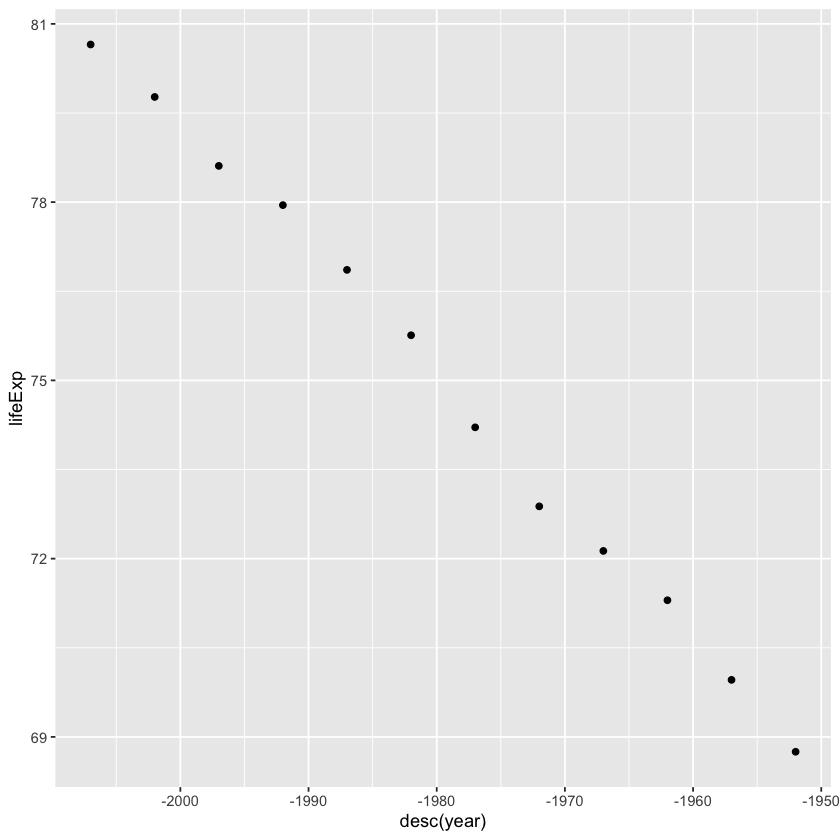

In [51]:
### BEGIN SOLUTION
answer1.6 <- gapminder %>% 
  filter(country == "Canada") %>% 
  ggplot(aes(desc(year), lifeExp)) +
  geom_point()
### END SOLUTION
print(answer1.6)

In [52]:
test_that("Answer 1.6", {
    expect_true(
        digest(as.character(rlang::get_expr(answer1.6$mapping))) %in%
        c("f02a3570b3f25fab66031b9fa16c8bc4", 
          "8141f2476b2b50ff403f6ce68263cb93", 
          "f097628c1fccc00f80485cdc54a37f65")
    )
})
cat("success!")

success!

**QUESTION 1.7**

Instead of alpha transparency, we can fix the overplotting issue by making the points smaller. Why is this not working? Fix it.

Assign your answer to a variable named `answer1.7`

```
answer1.7 <- ggplot(gapminder) +
  geom_point(aes(gdpPercap, lifeExp, size = 0.1)) +
  scale_x_log10(labels = scales::dollar_format())
```

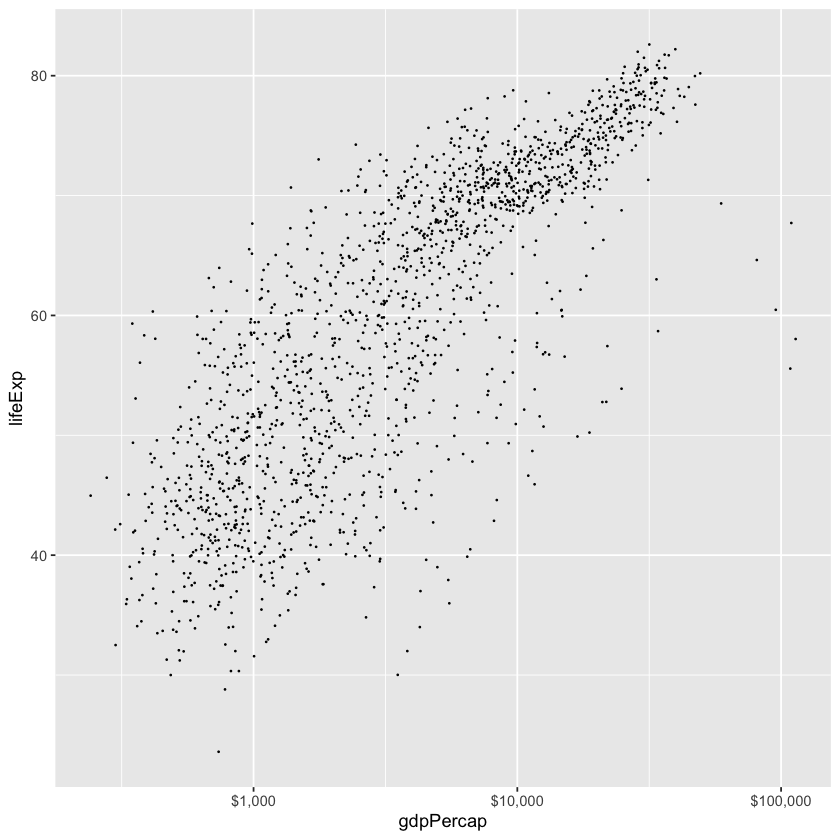

In [53]:
### BEGIN SOLUTION
answer1.7 <- ggplot(gapminder) +
  geom_point(aes(gdpPercap, lifeExp), size = 0.1) +
  scale_x_log10(labels = scales::dollar_format())
### END SOLUTION
print(answer1.7)

In [54]:
test_that("Answer 1.7", {
    expect_false("size" %in% names(answer1.7$layers[[1]]$mapping))
    expect_equal(answer1.7$layers[[1]]$geom_params$size, 0.1)
})
cat("success!")

success!

**QUESTION 1.8**

Fix the plot so that the size of the dots is related to the body mass, and so that the dots are colored by species.

Assign your answer to a variable named `answer1.8` 

```
answer1.8 <- ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm) +
       geom_point(shape = 21,
                  size = species,
                  fill = island))
```                  

Warning message:
“Removed 2 rows containing missing values (geom_point).”


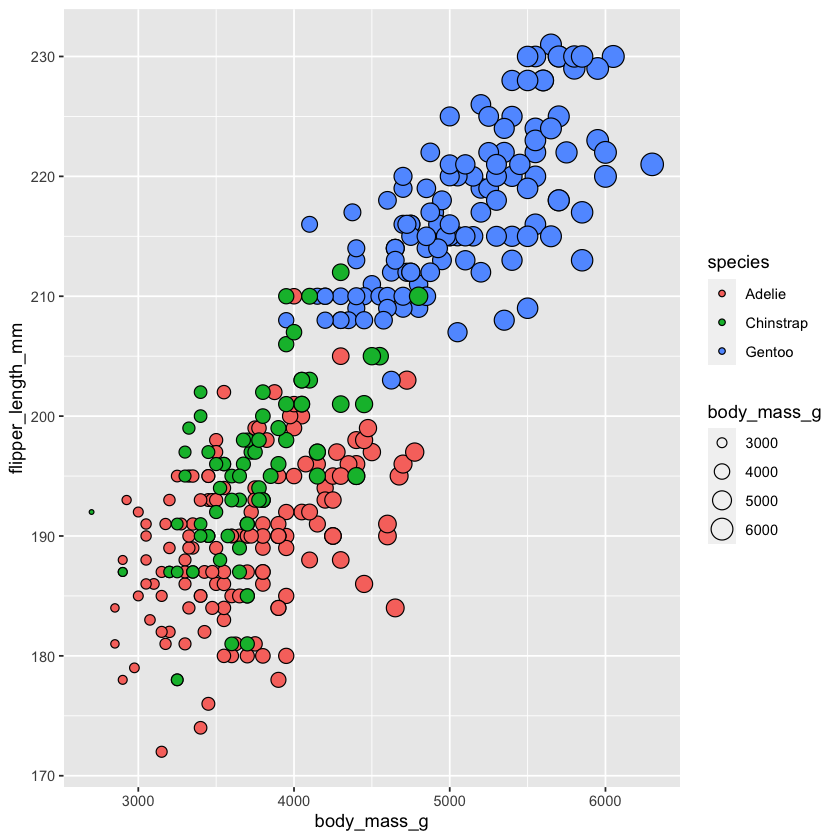

In [55]:
### BEGIN SOLUTION
answer1.8 <- ggplot(penguins, aes(x    = body_mass_g, 
                                  y    = flipper_length_mm, 
                                  size = body_mass_g, 
                                  fill = species)) +
        geom_point(shape = 21)
### END SOLUTION
print(answer1.8)

In [56]:
test_that("Answer 1.8", {
    expect_true("x" %in% names(answer1.8$mapping) | "x" %in% names(answer1.8$layers[[1]]$mapping))
    expect_true("y" %in% names(answer1.8$mapping) | "y" %in% names(answer1.8$layers[[1]]$mapping))
    expect_true("size" %in% names(answer1.8$mapping) | "size" %in% names(answer1.8$layers[[1]]$mapping))
    expect_true("fill" %in% names(answer1.8$mapping) | "fill" %in% names(answer1.8$layers[[1]]$mapping))
})
cat("success!")

success!

**QUESTION 1.9**

Consider the code below:

```
gapminder %>%
  ggplot(aes(gdpPercap, lifeExp)) +
  geom_point(alpha = 0.2) +
  scale_x_log10()
```

Modify the plot: 

- Change the x-axis text to be in "comma format" with `scales::comma_format()`.
- Separate each continent into sub-panels, in a single row of plots.

Assign your answer to a variable named `answer1.9`

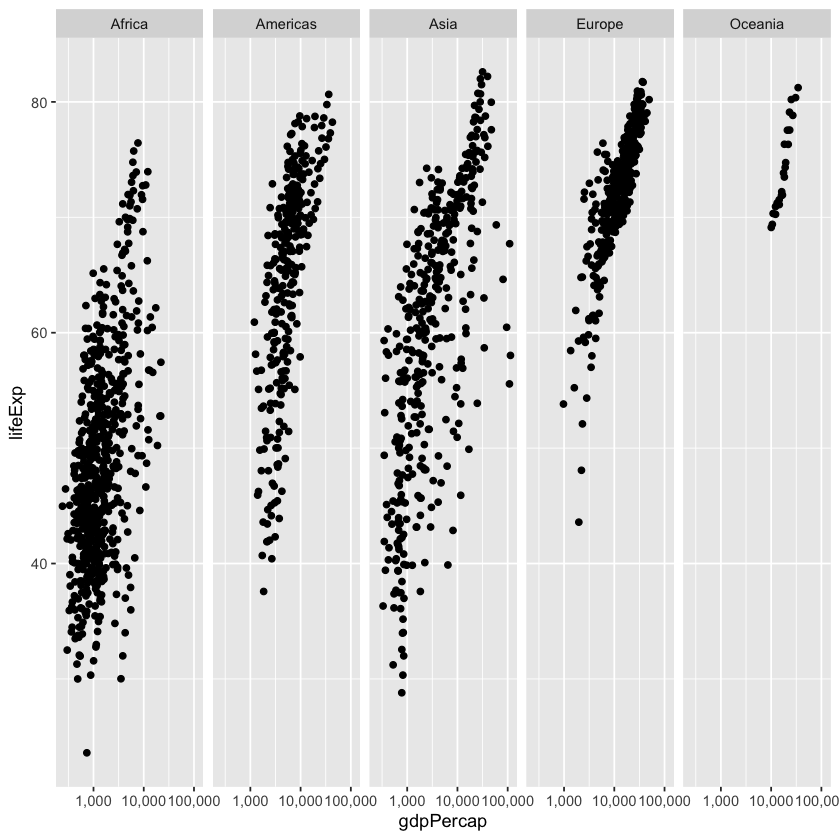

In [57]:
### BEGIN SOLUTION
answer1.9 <- gapminder %>%
  ggplot(aes(gdpPercap, lifeExp)) +
  facet_wrap(~ continent, nrow = 1) +
  geom_point() +
  scale_x_log10(labels = scales::comma_format()) 
### END SOLUTION
print(answer1.9)

In [58]:
test_that("Answer 1.9", {
    expect_equal(names(answer1.9$facet$params$facets), "continent")
})
cat("success!")

success!

### 1.1 Investigate the `penguins` dataset with plots

**QUESTION 1.10**

Plot the `penguins` body mass (on the y axis) vs. flipper length (on the x axis) using a **scatterplot**, with the following specifications:
+ Color by `species`
+ Set the `size` of the points to 3, and the `alpha` to 0.8
+ Set the theme to minimal

Assign your answer to a variable named `answer1.10`

```
answer1.10 <- ggplot(data = FILL_THIS_IN,
                      FILL_THIS_IN(x = FILL_THIS_IN,
                                   y = FILL_THIS_IN)) +
 FILL_THIS_IN(FILL_THIS_IN(color = FILL_THIS_IN),
              size = FILL_THIS_IN,
              alpha = FILL_THIS_IN) +
 FILL_THIS_IN() 
```

Warning message:
“Removed 2 rows containing missing values (geom_point).”


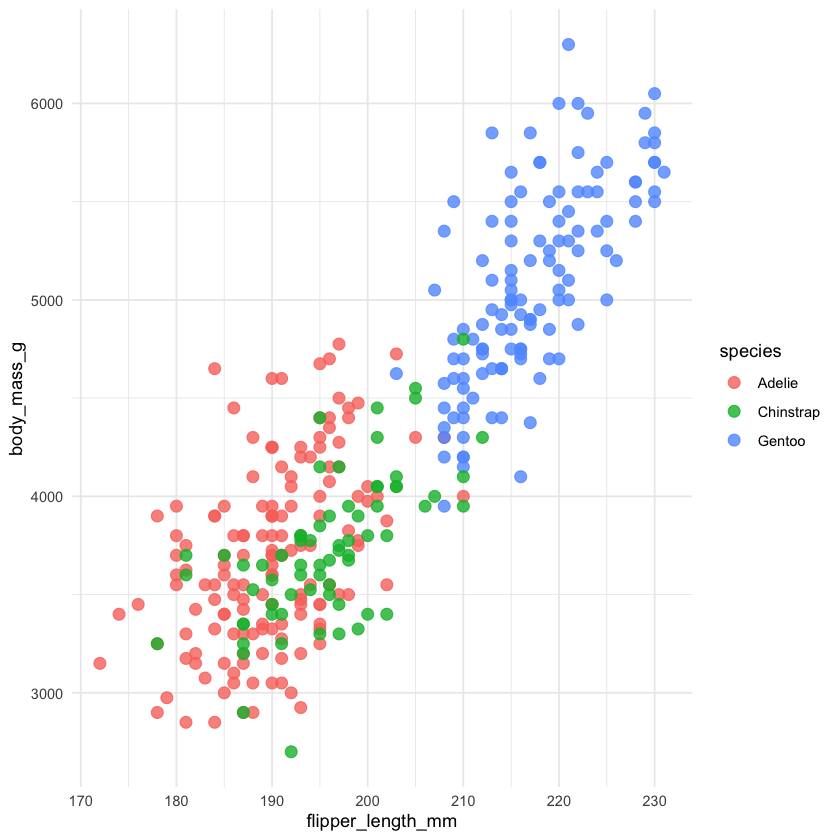

In [59]:
### BEGIN SOLUTION
answer1.10 <- ggplot(data = penguins,
                       aes(x = flipper_length_mm,
                           y = body_mass_g)) +
  geom_point(aes(color = species),
             size = 3,
             alpha = 0.8) +
  theme_minimal() 
### END SOLUTION
print(answer1.10)

In [60]:
test_that("Answer 1.10", {
    expect_true("species" %in% as.character(answer1.10$mapping$colour) | 
                "species" %in% as.character(answer1.10$layers[[1]]$mapping$colour))
    expect_true("flipper_length_mm" %in% as.character(answer1.10$mapping$x) | 
                "flipper_length_mm" %in% as.character(answer1.10$layers[[1]]$mapping$x))
    expect_true("body_mass_g" %in% as.character(answer1.10$mapping$y) | 
                "body_mass_g" %in% as.character(answer1.10$layers[[1]]$mapping$y))
    expect_equal(answer1.10$layers[[1]]$geom_params$size, 3)
    expect_equal(answer1.10$layers[[1]]$geom_params$alpha, 0.8)
})
cat("success!")

success!

**QUESTION 1.11**

Repeat the same graph as above, this time coloring by sex, and separating each species into subpanels.

Assign your answer to a variable named `answer1.11`

Warning message:
“Removed 2 rows containing missing values (geom_point).”


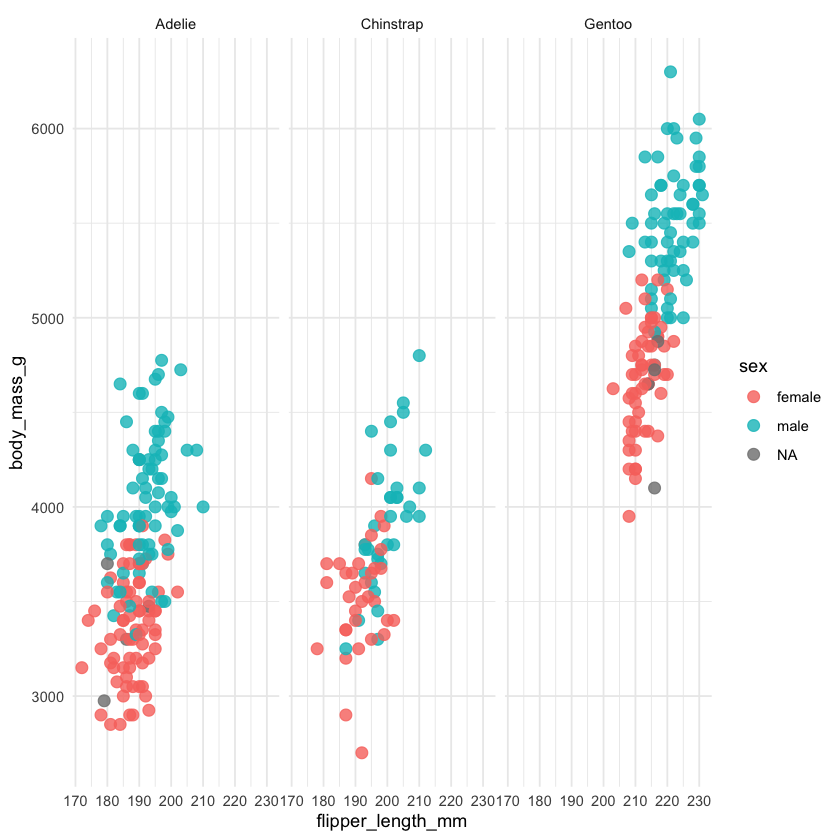

In [61]:
### BEGIN SOLUTION
answer1.11 <- ggplot(data = penguins,
                       aes(x = flipper_length_mm,
                           y = body_mass_g)) +
  geom_point(aes(color = sex),
             size = 3,
             alpha = 0.8) +
  theme_minimal() +
  facet_wrap(~species)
### END SOLUTION
print(answer1.11)

In [62]:
test_that("Answer 1.11", {
    expect_true("sex" %in% as.character(answer1.11$mapping$colour) | 
                "sex" %in% as.character(answer1.11$layers[[1]]$mapping$colour))
    expect_true("flipper_length_mm" %in% as.character(answer1.11$mapping$x) | 
                "flipper_length_mm" %in% as.character(answer1.11$layers[[1]]$mapping$x))
    expect_true("body_mass_g" %in% as.character(answer1.11$mapping$y) | 
                "body_mass_g" %in% as.character(answer1.11$layers[[1]]$mapping$y))
    expect_equal(answer1.11$layers[[1]]$geom_params$size, 3)
    expect_equal(answer1.11$layers[[1]]$geom_params$alpha, 0.8)
    expect_equal(names(answer1.11$facet$params$facets), "species")
})
cat("success!")

success!

*Not autograded:* What could we add to improve the above graph? This time, try to replicate the graph above, using `labs()` to add:
+ A `title`
+ A `subtitle`
+ Change the names of the `x` and `y` axes to something more readable (without _)
+ A `legend` for what the `color` indicates

Feeling inspired? You can also try to specify colors with `scale_color_manual()`!